In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import root_mean_squared_error as rmse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Dibimbing BI/StudentPerformanceFactors.csv')

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Preprocessing

In [ ]:
# Searching for null values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# calculating how many percentages are the null values
(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum()/len(df) * 100)

,0
Teacher_Quality,1.180566
Parental_Education_Level,1.362192
Distance_from_Home,1.014076


In [ ]:
# since it is a small percentages, drop the null values
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


In [ ]:
# since the max value of exam is 101, it is higly likely an outlier
df = df[df['Exam_Score'] <= 100]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6377.0,19.976008,5.985283,1.0,16.0,20.0,24.0,44.0
Attendance,6377.0,80.018034,11.549434,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6377.0,7.035126,1.468091,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6377.0,75.063353,14.399766,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6377.0,1.494747,1.233300,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6377.0,2.972714,1.029006,0.0,2.0,3.0,4.0,6.0
Exam_Score,6377.0,67.246825,3.891637,55.0,65.0,67.0,69.0,100.0


# EDA

<ipython-input-12-328e2715dcfc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set1', hue=None)
<ipython-input-12-328e2715dcfc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set1', hue=None)
<ipython-input-12-328e2715dcfc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set1', hue=None)
<ipython-input-12-328e2715dcfc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

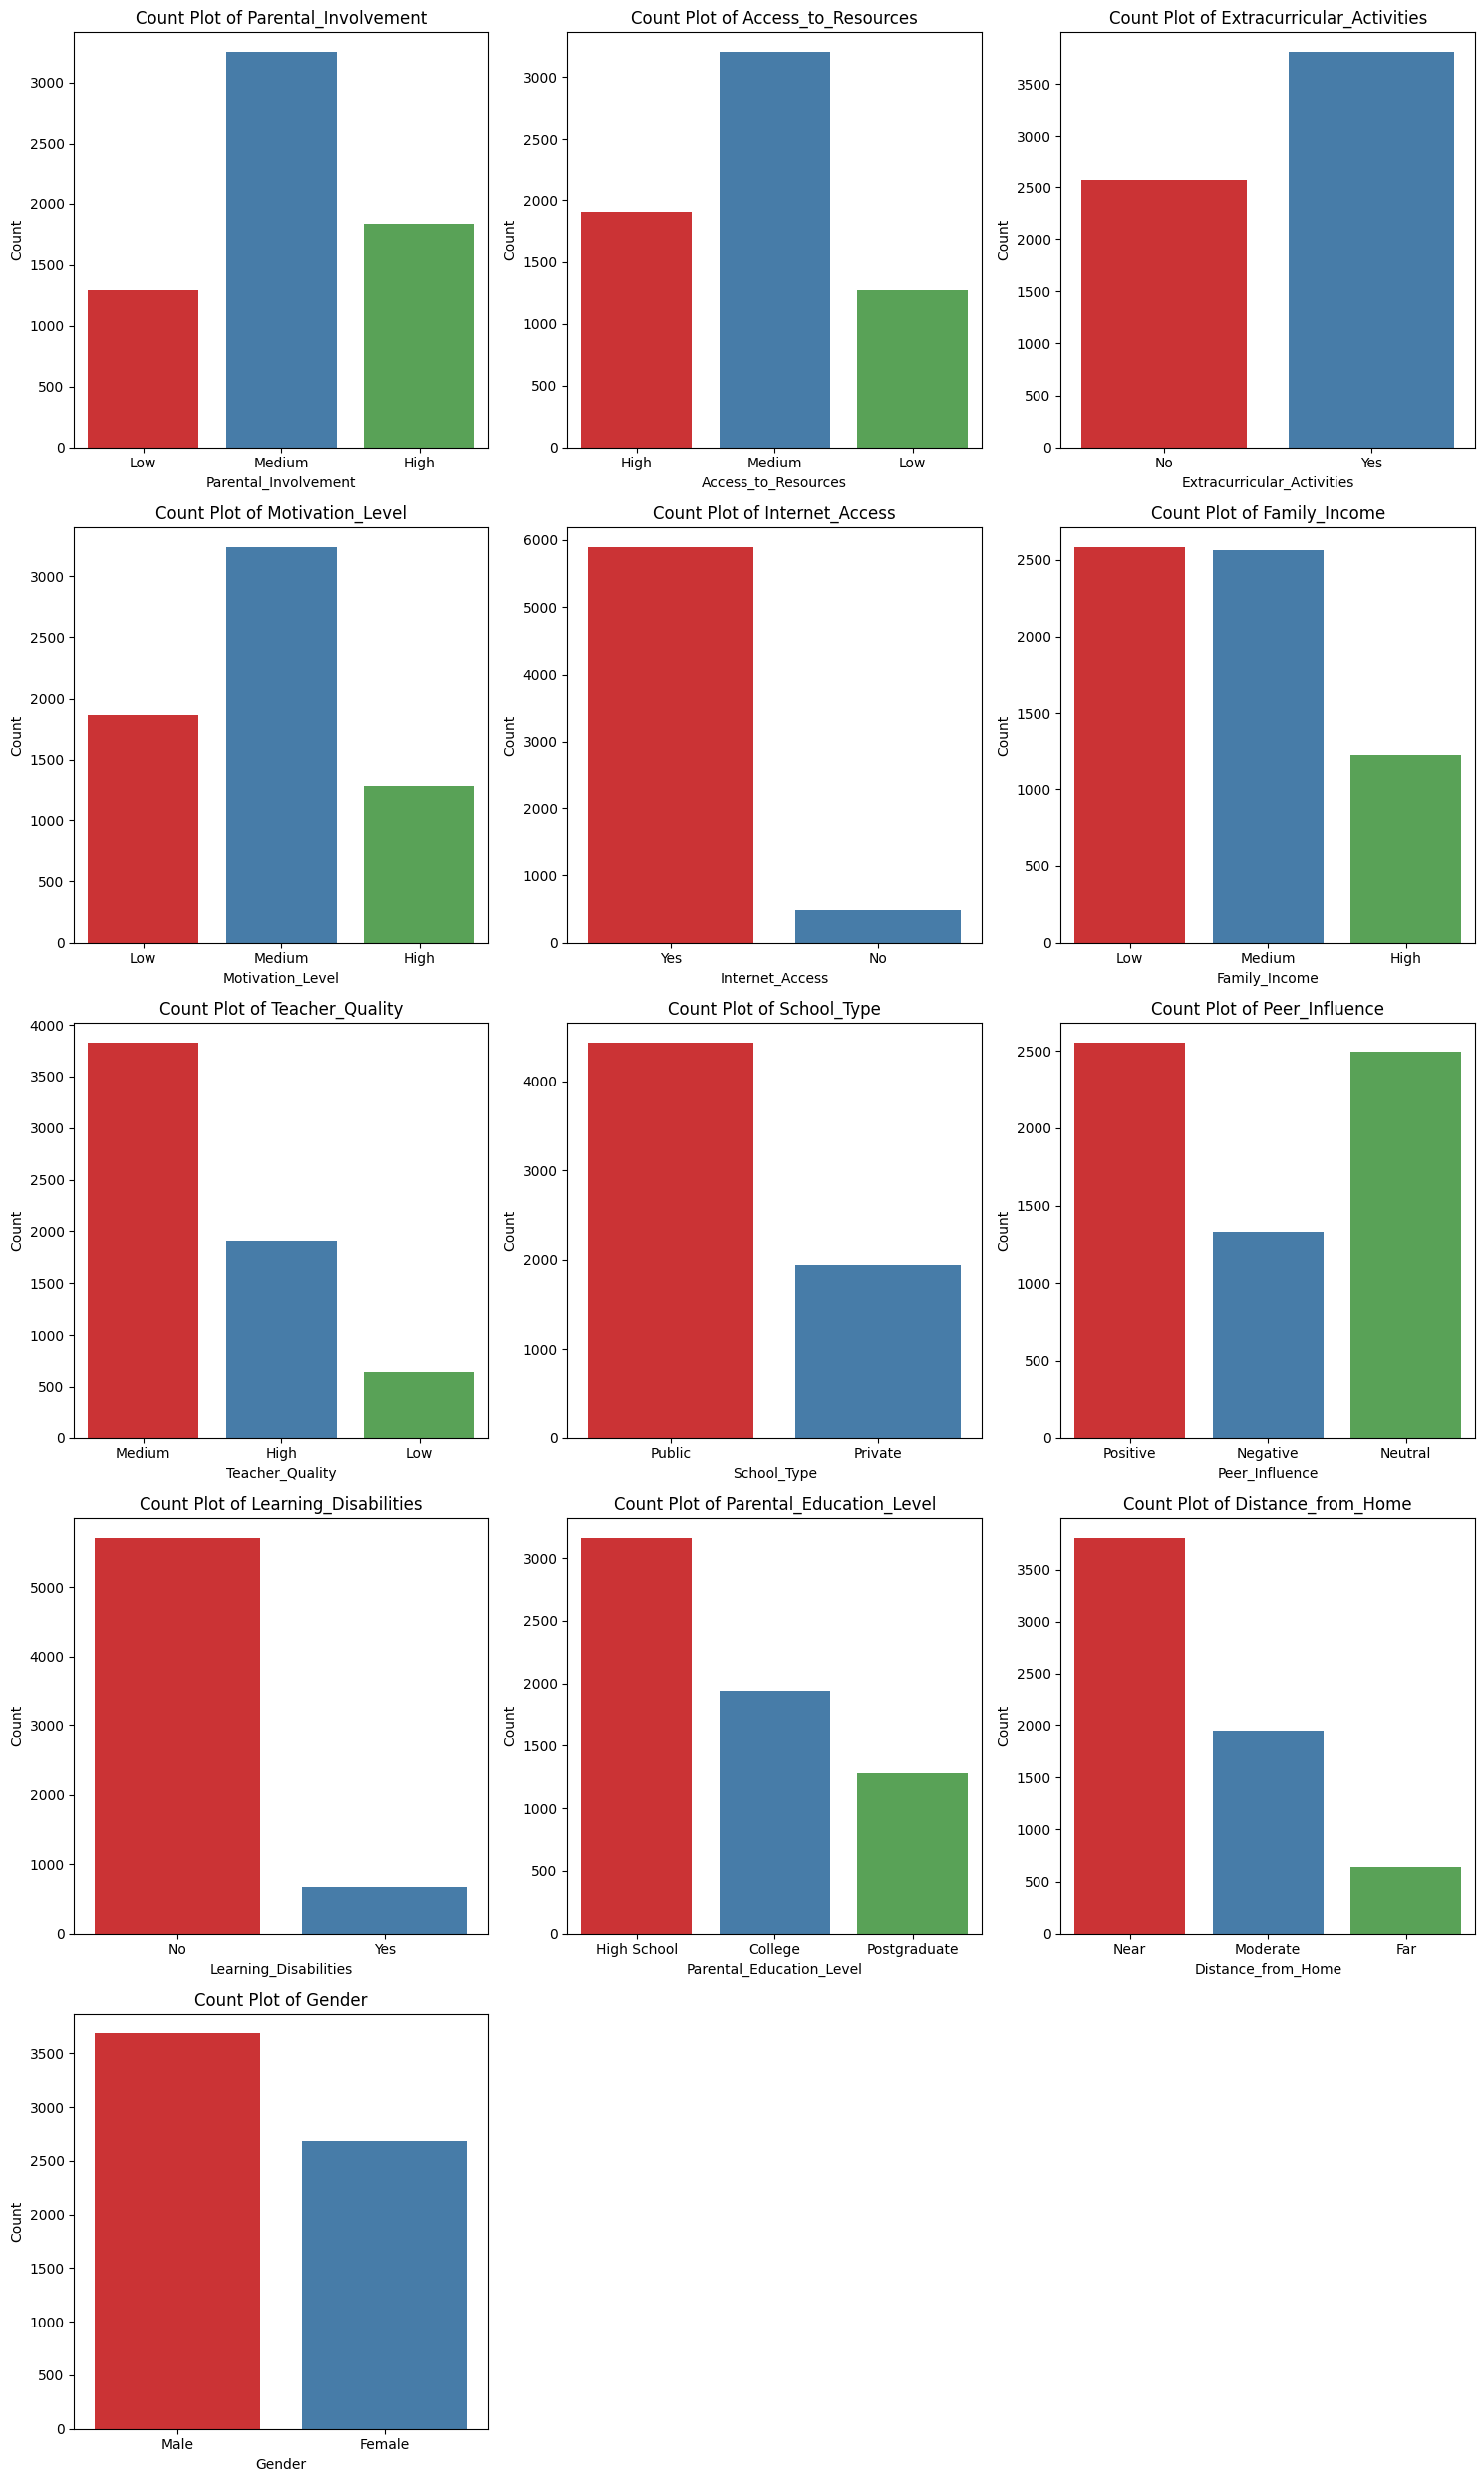

In [ ]:
# Identify object-type columns
object_cols = df.select_dtypes(include=['object']).columns

# Set the number of columns for the subplots
num_cols = 3  # Adjust this based on how many plots you want per row
num_rows = (len(object_cols) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each object-type column in the DataFrame
for i, col in enumerate(object_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set1', hue=None)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

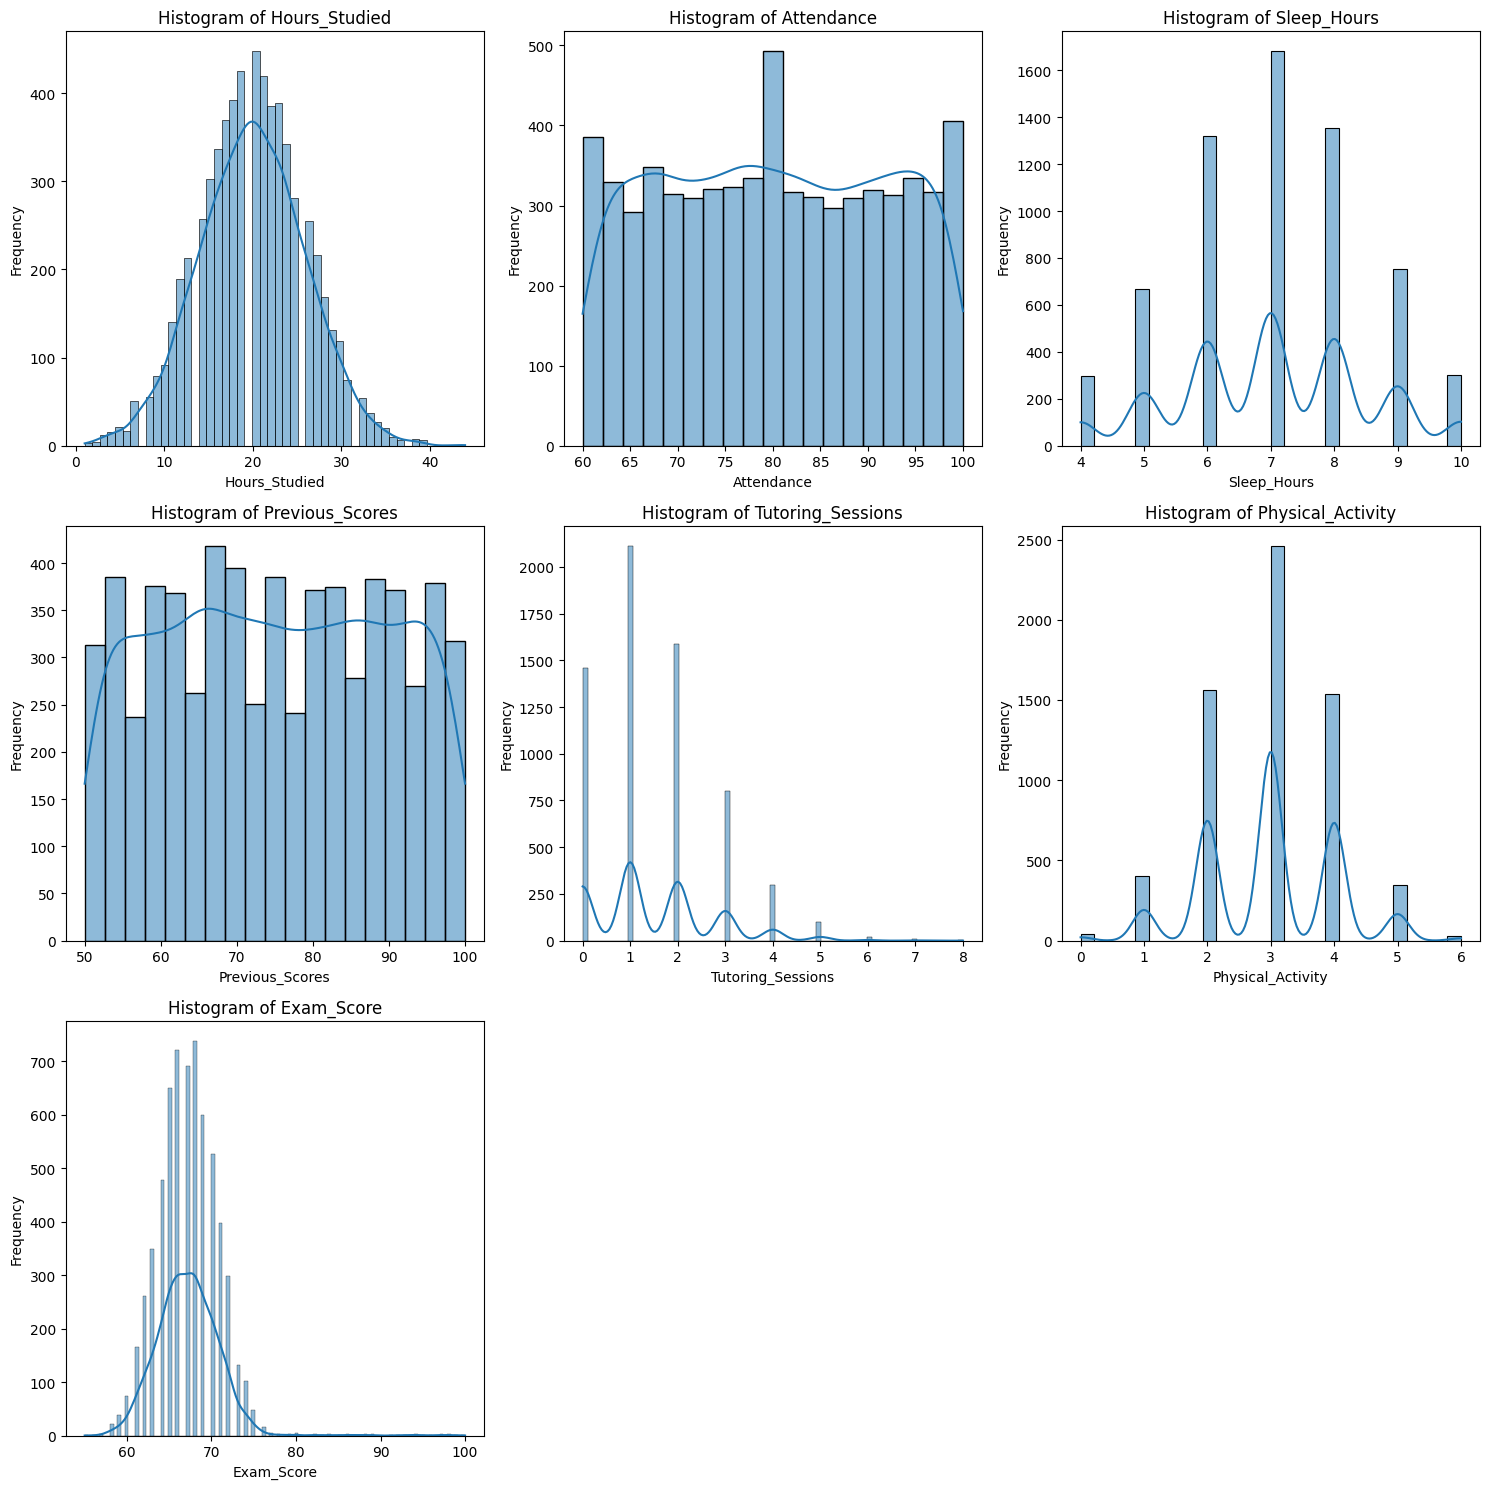

In [ ]:
# visualizing 'numeric' columns
# Identify non-object columns
numeric_cols = df.select_dtypes(exclude=['object']).columns

# Set the number of columns for the subplots
num_cols = 3  # Adjust this based on how many plots you want per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each non-object column in the DataFrame
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# dividing the data into numeric and category
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


## Correlation

<Axes: >

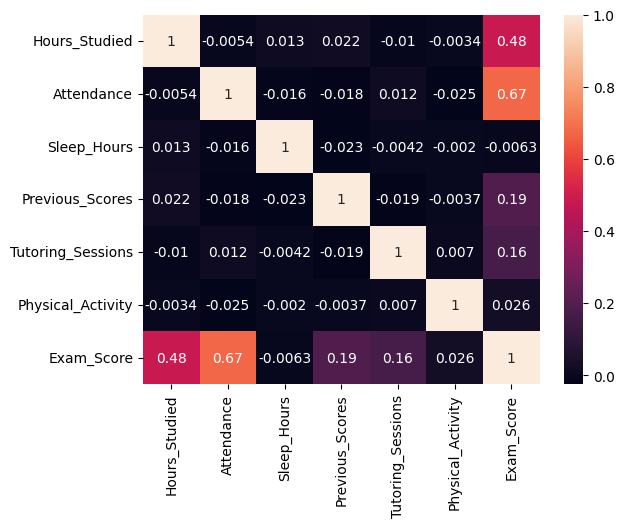

In [ ]:
# looking for columns with the best correlation
# using spearman because of exam_scores distribution
sns.heatmap(df_numeric.corr('spearman'), annot=True)

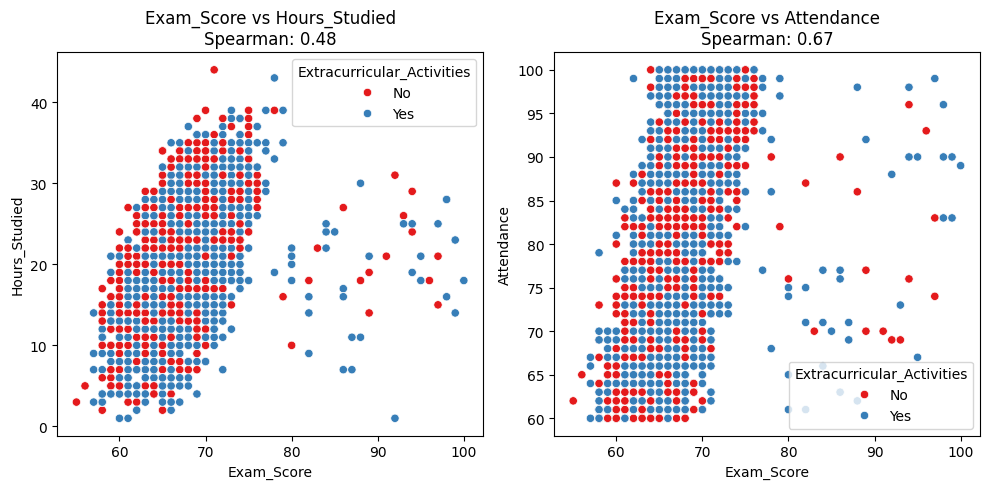

In [ ]:
# Filter columns with Spearman correlation > 0.4
columns_to_plot = [(col, df['Exam_Score'].corr(df[col], method='spearman'))
                   for col in df_numeric if col != 'Exam_Score'
                   and df['Exam_Score'].corr(df[col], method='spearman') > 0.4]

# Create subplots dynamically
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 5))

# Ensure axes is iterable even if there's only one plot
axes = [axes] if len(columns_to_plot) == 1 else axes

# Plot scatterplots with 'Extracurricular_Activities' as the hue
for ax, (col, corr) in zip(axes, columns_to_plot):
    sns.scatterplot(data=df, x='Exam_Score', y=col, hue='Extracurricular_Activities', ax=ax, palette='Set1')
    ax.set_title(f'Exam_Score vs {col}\nSpearman: {corr:.2f}')
    ax.set_xlabel('Exam_Score')
    ax.set_ylabel(col)
    ax.legend(title='Extracurricular_Activities')

plt.tight_layout()
plt.show()

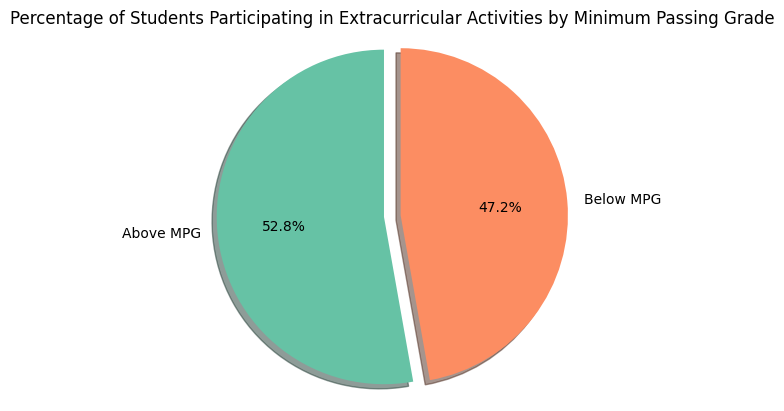

In [ ]:
# Set Minimum Passing Grade (MPG)
mpg = 75

# Count students above and below MPG who participate in extracurricular activities
above_mpg_count = df.query("Exam_Score > @mpg and Extracurricular_Activities == 'Yes'").shape[0]
below_mpg_count = df.query("Exam_Score <= @mpg and Extracurricular_Activities == 'Yes'").shape[0]

# Total students above and below MPG
total_above_mpg = df.query("Exam_Score > @mpg").shape[0]
total_below_mpg = df.query("Exam_Score <= @mpg").shape[0]

# Calculate percentages
sizes = [above_mpg_count / total_above_mpg * 100 if total_above_mpg else 0,
         below_mpg_count / total_below_mpg * 100 if total_below_mpg else 0]

# Create pie chart
plt.pie(sizes, explode=(0.1, 0), labels=['Above MPG', 'Below MPG'], colors=['#66c2a5', '#fc8d62'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

# Title
plt.title('Percentage of Students Participating in Extracurricular Activities by Minimum Passing Grade')
plt.show()


In [ ]:
df_category = df.select_dtypes(include = 'object')
df_category

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [ ]:
# searching for unique values in every categorical columns
for col in df_category:
    print(f"Unique values in column '{col}':")
    print(df_category[col].unique())
    print("-" * 40)

Unique values in column 'Parental_Involvement':
['Low' 'Medium' 'High']
----------------------------------------
Unique values in column 'Access_to_Resources':
['High' 'Medium' 'Low']
----------------------------------------
Unique values in column 'Extracurricular_Activities':
['No' 'Yes']
----------------------------------------
Unique values in column 'Motivation_Level':
['Low' 'Medium' 'High']
----------------------------------------
Unique values in column 'Internet_Access':
['Yes' 'No']
----------------------------------------
Unique values in column 'Family_Income':
['Low' 'Medium' 'High']
----------------------------------------
Unique values in column 'Teacher_Quality':
['Medium' 'High' 'Low']
----------------------------------------
Unique values in column 'School_Type':
['Public' 'Private']
----------------------------------------
Unique values in column 'Peer_Influence':
['Positive' 'Negative' 'Neutral']
----------------------------------------
Unique values in column 'Lear

## Chi-Square

In [ ]:
df_chi = pd.crosstab(df_category['Family_Income'], df_category['Motivation_Level'])
df_chi

Motivation_Level,High,Low,Medium
Family_Income,,,
High,243,363,623
Low,497,769,1316
Medium,537,731,1298


Null Hypothesis (H0): There is no significant relationship between Family Income and Motivation Level among students.

Alternative Hypothesis (H1): There is a significant relationship between Family Income and Motivation Level among students.

In [ ]:
# doing chi-square with df-chi table
stat, p, dof, expected = chi2_contingency(df_chi)

In [ ]:
expected

array([[ 246.10835816,  359.04453505,  623.84710679],
       [ 517.04782813,  754.31488161, 1310.63729026],
       [ 513.84381371,  749.64058335, 1302.51560295]])

In [ ]:
stat

2.6918441622411713

In [ ]:
p

0.6106425320529862

In [ ]:
dof

4

We accept the null hypothesis (H0) which states that there is no significant relationship between Family Income and Motivation Level among students

In [ ]:
df_chi2 = pd.crosstab(df_category['Teacher_Quality'], df_category['Motivation_Level'])
df_chi2

Motivation_Level,High,Low,Medium
Teacher_Quality,,,
High,398,567,939
Low,132,152,363
Medium,747,1144,1935


Null Hypothesis (H0): There is no significant relationship between Teacher Quality and Motivation Level among students.

Alternative Hypothesis (H1): There is a significant relationship between Teacher Quality and Motivation Level among students.

In [ ]:
stat, p, dof, expected = chi2_contingency(df_chi2)

In [ ]:
expected

array([[ 381.27771679,  556.24149286,  966.48079034],
       [ 129.56233339,  189.01693586,  328.42073075],
       [ 766.15994982, 1117.74157127, 1942.09847891]])

In [ ]:
stat

13.780919856997555

In [ ]:
p

0.00802811516484226

In [ ]:
dof

4

We reject the null hypothesis (H0), which posits that there is no significant relationship between Teacher Quality and Motivation Level among students.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   object
 1

In [ ]:
score_by_gender = pd.pivot_table(
    df,
    index='School_Type',
    columns='Gender',
    values='Exam_Score',
    aggfunc='mean'
)

score_by_gender

Gender,Female,Male
School_Type,,
Private,67.337871,67.301056
Public,67.229665,67.206505


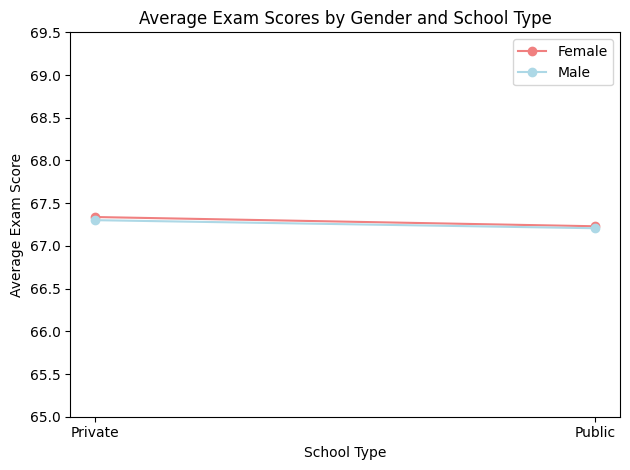

In [ ]:
# Assigning values from the pivot table
school_types = score_by_gender.index
female_scores = score_by_gender['Female']
male_scores = score_by_gender['Male']

# Create line plot
plt.plot(school_types, female_scores, marker='o', label='Female', color='lightcoral')
plt.plot(school_types, male_scores, marker='o', label='Male', color='lightblue')

# Labels and title
plt.xlabel('School Type')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Gender and School Type')
plt.legend()

# Set custom y-ticks for spacing
plt.yticks(np.arange(65, 70, 0.5))  # Adjust the range and step as needed

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
score_by_excul = pd.pivot_table(
    df,
    index='Extracurricular_Activities',
    columns='Gender',
    values='Exam_Score',
    aggfunc='mean'
)

score_by_excul

Gender,Female,Male
Extracurricular_Activities,,
No,66.901460,66.989153
Yes,67.510358,67.399910


In [ ]:
distance_to_score = pd.pivot_table(
    df,
    index='Distance_from_Home',
    values='Exam_Score',
    aggfunc='mean'
).sort_values('Exam_Score', ascending=False)

distance_to_score

,Exam_Score
Distance_from_Home,
Near,67.513812
Moderate,66.969072
Far,66.498428


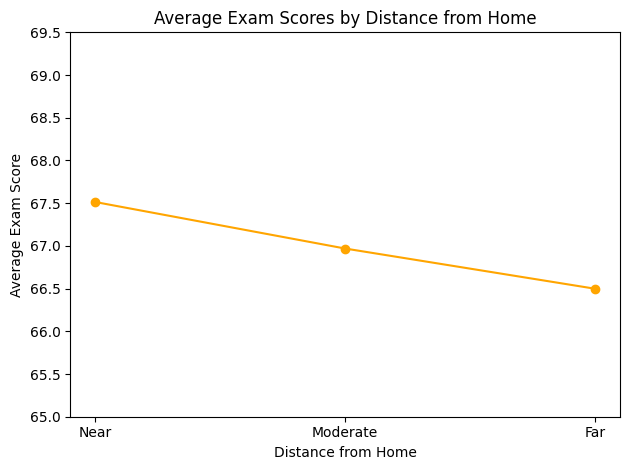

In [ ]:
# Assigning values from the pivot table
distances = distance_to_score.index
exam_scores = distance_to_score['Exam_Score']

# Create line plot
plt.plot(distances, exam_scores, marker='o', color='orange')

# Labels and title
plt.xlabel('Distance from Home')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Distance from Home')

# Set custom y-ticks for spacing (optional)
plt.yticks(np.arange(65, 70, 0.5))  # Adjust the range and step as needed

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
avg_score_by_motivation = pd.pivot_table(
    df,
    index='Motivation_Level',
    values='Exam_Score',
    aggfunc='mean'
).sort_values('Exam_Score', ascending=False)

avg_score_by_motivation

,Exam_Score
Motivation_Level,
High,67.743931
Medium,67.338894
Low,66.746108


In [ ]:
par_involve = pd.pivot_table(
    df,
    index='Parental_Involvement',
    values='Exam_Score',
    aggfunc='mean'
).sort_values('Exam_Score', ascending=False)

par_involve

,Exam_Score
Parental_Involvement,
High,68.112200
Medium,67.113196
Low,66.351938


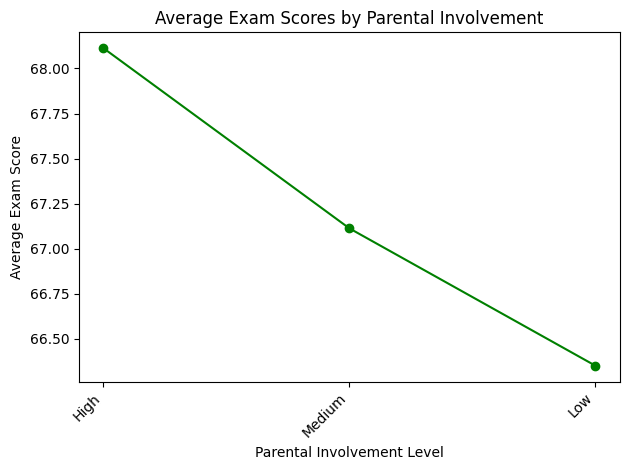

In [ ]:
# Assigning values from the pivot table
parental_involvement = par_involve.index
exam_scores = par_involve['Exam_Score']

# Create line chart
plt.plot(parental_involvement, exam_scores, marker='o', color='green')

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Parental Involvement Level')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Parental Involvement')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
l_disabilities = pd.pivot_table(
    df,
    index='Learning_Disabilities',
    values='Exam_Score',
    aggfunc='mean'
)

l_disabilities

,Exam_Score
Learning_Disabilities,
No,67.358557
Yes,66.291916


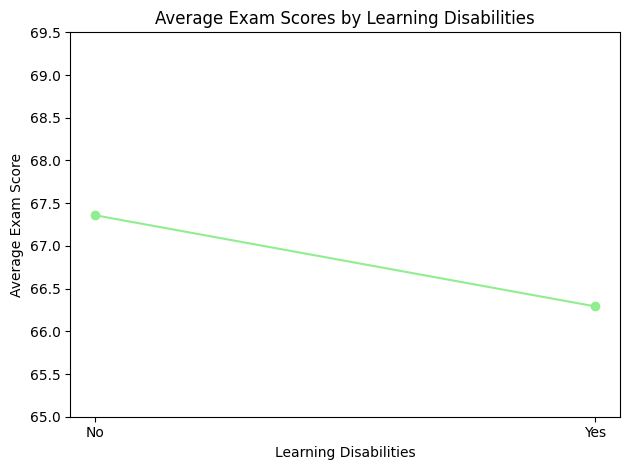

In [ ]:
# Assigning values from the pivot table
learning_disabilities = l_disabilities.index
exam_scores = l_disabilities['Exam_Score']

# Create line plot
plt.plot(learning_disabilities, exam_scores, marker='o', color='lightgreen')

# Labels and title
plt.xlabel('Learning Disabilities')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Learning Disabilities')

# Set custom y-ticks for spacing
plt.yticks(np.arange(65, 70, 0.5))  # Adjust the range and step as needed

# Show plot
plt.tight_layout()
plt.show()